In [1]:
#Importe de librerías a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leo los archivos
df_reviews = pd.read_csv("df_reviews_data.csv")
df_items = pd.read_parquet("df_items_data.parquet")
df_games = pd.read_csv("df_games_data.csv")

In [3]:
df_games

,genres,app_name,title,release_date,tags,id
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",761140
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,2018,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",643980
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017,"['Free to Play', 'Simulation', 'Sports', 'Casu...",670290
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,2017,"['Action', 'Adventure', 'Casual']",767400
4,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,Battle Royale Trainer,2018,"['Action', 'Adventure', 'Simulation', 'FPS', '...",772540
...,...,...,...,...,...,...
29749,"['Action', 'Adventure', 'Casual', 'Indie']",Kebab it Up!,Kebab it Up!,2018,"['Action', 'Indie', 'Casual', 'Violent', 'Adve...",745400
29750,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,Colony On Mars,2018,"['Strategy', 'Indie', 'Casual', 'Simulation']",773640
29751,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,LOGistICAL: South Africa,2018,"['Strategy', 'Indie', 'Casual']",733530
29752,"['Indie', 'Racing', 'Simulation']",Russian Roads,Russian Roads,2018,"['Indie', 'Simulation', 'Racing']",610660


In [4]:
df_items

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6.0
1,76561197970982479,20,Team Fortress Classic,0.0
2,76561197970982479,30,Day of Defeat,7.0
3,76561197970982479,40,Deathmatch Classic,0.0
4,76561197970982479,50,Half-Life: Opposing Force,0.0
...,...,...,...,...
5094087,76561198329548331,346330,BrainBread 2,0.0
5094088,76561198329548331,373330,All Is Dust,0.0
5094089,76561198329548331,388490,One Way To Die: Steam Edition,3.0
5094090,76561198329548331,521570,You Have 10 Seconds 2,4.0


In [5]:
df_reviews

,user_id,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,1,2011,1250,True
1,76561197970982479,1,2011,22200,True
2,76561197970982479,1,2011,43110,True
3,js41637,1,2014,251610,True
4,js41637,1,2013,227300,True
...,...,...,...,...,...
48493,wayfeng,1,2015,730,True
48494,76561198251004808,2,2015,253980,True
48495,72947282842,0,2015,730,True
48496,ApxLGhost,1,2015,730,True


In [6]:
#Los 5 juegos más recomendados
#Del archivo df_user_new se filtran los regoistros con recommend = 1 (True)
df_reviews_aux = df_reviews[df_reviews['recommend'] == True]
#Se cuenta la totalidad de recomendaciones por item
recommend_by_item = df_reviews_aux.groupby('item_id')['recommend'].count().reset_index()
#Ordenamos descendentemente por recommend_by_item
recommend_by_item = recommend_by_item.sort_values(by='recommend',ascending=False)
#Seleccionamos los primeros 5 juegos
top = recommend_by_item.head(5)
#Cruzamos contra df_games para obtener los nombres de los item
top = pd.merge(top, df_games[['id', 'app_name']], left_on='item_id', right_on= 'id', how = 'left')

top

,item_id,recommend,id,app_name
0,440,3325,440.0,Team Fortress 2
1,730,2791,730.0,Counter-Strike: Global Offensive
2,4000,1514,4000.0,Garry's Mod
3,570,1315,NaN,NaN
4,304930,822,304930.0,Unturned


In [7]:

# Asegúrate de que 'id' en df_games sea de tipo int64
df_games['id'] = df_games['id'].astype('int64')
# Realizar un groupby por 'item_id' y sumar 'playtime_forever' para cada juego
grouped_playtime = df_items.groupby('item_id')['playtime_forever'].sum().reset_index()
grouped_playtime.sort_values(by='playtime_forever', ascending=False,inplace=True) 

# Luego realiza la fusión
top_playtime2 = pd.merge(grouped_playtime, df_games[['id', 'app_name']], left_on='item_id', right_on='id', how='left')




print(grouped_playtime)



# Combinar con el DataFrame original para obtener los nombres de los juegos
top_playtime2 = pd.merge(grouped_playtime, df_games[['id', 'app_name']], left_on='item_id', right_on='id', how='left')


# Ordenar el DataFrame resultante en orden descendente por 'playtime_forever'
top_playtime2 = top_playtime2.sort_values(by='playtime_forever', ascending=False).head(5)


print(top_playtime2)

import matplotlib.pyplot as plt

# Convertir la columna 'app_name' a cadenas
top_playtime2['app_name'] = top_playtime2['app_name'].astype(str)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(8, 6))
plt.barh(top_playtime2['app_name'], top_playtime2['playtime_forever'], color='green')
plt.xlabel('Tiempo total jugado (horas)')
plt.title('Top 5 Juegos con Mayor Tiempo Jugado')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el juego con el tiempo jugado más alto en la parte superior

plt.show()

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

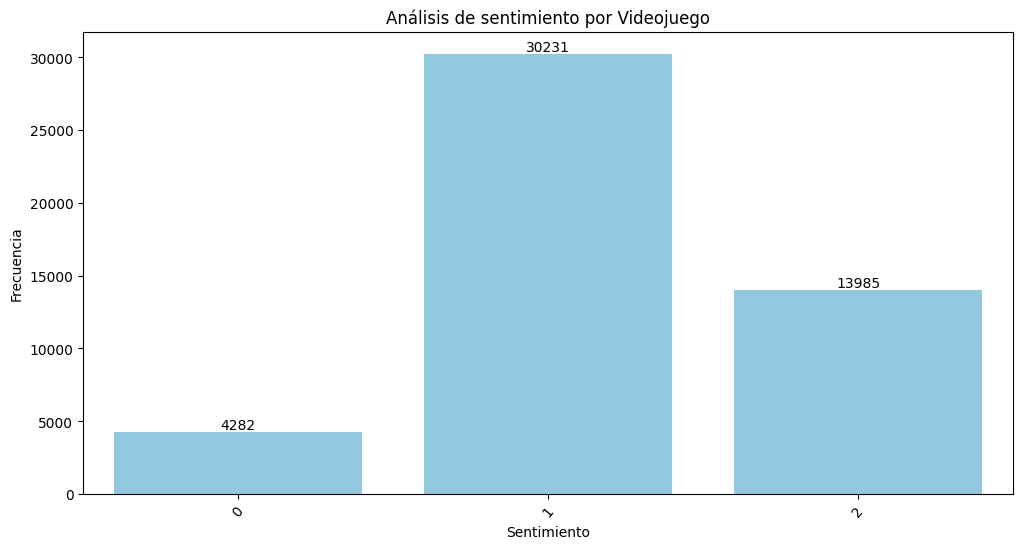

In [8]:
# Obtener los valores del análisis de sentimiento y su frecuencia
Analisis_sentimiento = df_reviews['sentiment_analysis'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=Analisis_sentimiento.index, y=Analisis_sentimiento.values, color='skyblue')

# Agregar etiquetas con la cantidad en cada barra
for p, label in zip(ax.patches, Analisis_sentimiento.values):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=50)
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Análisis de sentimiento por Videojuego')

plt.show()

In [9]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29754 entries, 0 to 29753
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        28657 non-null  object
 1   app_name      29754 non-null  object
 2   title         29754 non-null  object
 3   release_date  29754 non-null  int64 
 4   tags          29730 non-null  object
 5   id            29754 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


In [10]:
#Los 5 juegos más recomendados
#Del archivo df_user_new se filtran los regoistros con recommend = 1 (True)
df_reviews_aux = df_reviews[df_reviews['sentiment_analysis'] == 2]
#Se cuenta la totalidad de recomendaciones por item
recommend_by_item = df_reviews_aux.groupby('item_id')['sentiment_analysis'].count().reset_index()
#Ordenamos descendentemente por recommend_by_item
recommend_by_item = recommend_by_item.sort_values(by='sentiment_analysis',ascending=False)
#Seleccionamos los primeros 5 juegos
top = recommend_by_item.head(5)

top['item_id'] = top['item_id'].astype(str)
df_games['id'] = df_games['id'].astype(str)

#Cruzamos contra df_games para obtener los nombres de los item
top = pd.merge(top, df_games[['id', 'app_name']], left_on='item_id', right_on= 'id', how = 'left')


top

C:\Users\MaysonPenayo\AppData\Local\Temp\ipykernel_29392\96739780.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['item_id'] = top['item_id'].astype(str)


,item_id,sentiment_analysis,id,app_name
0,440,1151,440,Team Fortress 2
1,730,915,730,Counter-Strike: Global Offensive
2,4000,476,4000,Garry's Mod
3,570,439,NaN,NaN
4,218620,263,NaN,NaN


In [11]:
#Los 5 juegos más recomendados
#Del archivo df_user_new se filtran los regoistros con recommend = 1 (True)
df_reviews_aux = df_reviews[df_reviews['sentiment_analysis'] == 0]
#Se cuenta la totalidad de recomendaciones por item
recommend_by_item = df_reviews_aux.groupby('item_id')['sentiment_analysis'].count().reset_index()
#Ordenamos descendentemente por recommend_by_item
recommend_by_item = recommend_by_item.sort_values(by='sentiment_analysis',ascending=False)
#Seleccionamos los primeros 5 juegos
top = recommend_by_item.head(5)

top['item_id'] = top['item_id'].astype(str)
df_games['id'] = df_games['id'].astype(str)

#Cruzamos contra df_games para obtener los nombres de los item
top = pd.merge(top, df_games[['id', 'app_name']], left_on='item_id', right_on= 'id', how = 'left')


top

C:\Users\MaysonPenayo\AppData\Local\Temp\ipykernel_29392\3769314794.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['item_id'] = top['item_id'].astype(str)


,item_id,sentiment_analysis,id,app_name
0,730,279,730,Counter-Strike: Global Offensive
1,440,233,440,Team Fortress 2
2,4000,143,4000,Garry's Mod
3,570,106,NaN,NaN
4,218620,83,NaN,NaN


In [12]:
reviews_por_fecha = df_reviews['posted'].value_counts().reset_index()
reviews_por_fecha

,posted,count
0,2014,21834
1,2015,18154
2,2013,6713
3,2012,1201
4,2011,530
5,2010,66


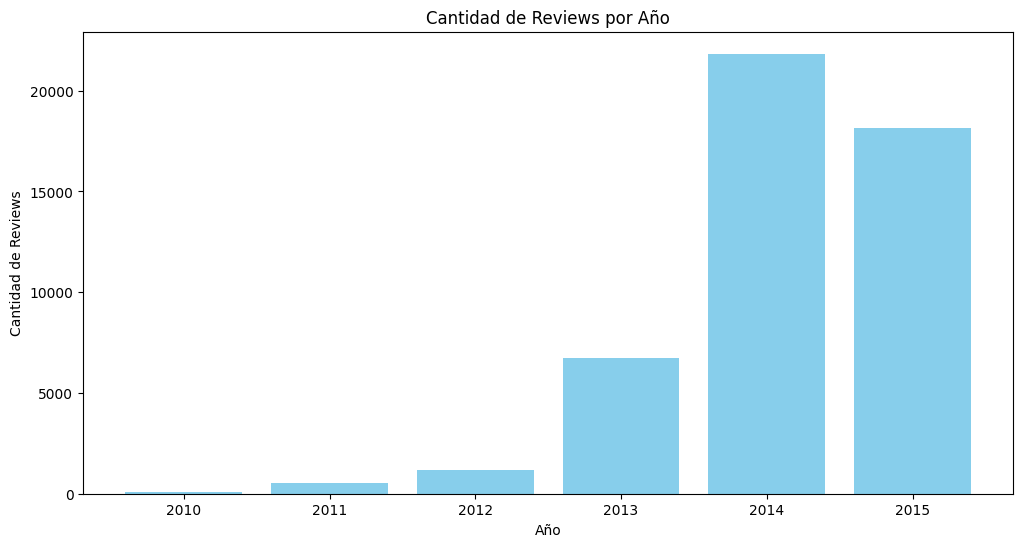

In [13]:
# Contar la cantidad de revisiones por año
reviews_por_anio = df_reviews['posted'].value_counts().reset_index()
reviews_por_anio.columns = ['Año', 'Cantidad de Reviews']
reviews_por_anio = reviews_por_anio.sort_values(by='Año')

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(reviews_por_anio['Año'], reviews_por_anio['Cantidad de Reviews'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reviews')
plt.title('Cantidad de Reviews por Año')
plt.show()